In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

from sklearn.metrics import accuracy_score

In [26]:
data = []
labels = []

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width * channels

In [28]:
Cells = np.load("./processed_data/data_train.npy")
labels = np.load("./processed_data/labels_train.npy")


# Spliting the images into train and validation sets
(X_train, X_val) = Cells[(int)(0.2 * len(labels)):], Cells[:(int)(0.2 * len(labels))]
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
(y_train, y_val) = labels[(int)(0.2 * len(labels)):], labels[:(int)(0.2 * len(labels))]

# Using one hote encoding for the train and validation labels
from keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)


In [29]:
# Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(7,7), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
# using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
                    validation_data=(X_val, y_val))

# Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [ ]:
model.save("./models/Test_Model.h5")

# Creating a model with only 2 epochs

Epoch 1/2
981/981 [==============================] - 62s 63ms/step - loss: 1.5847 - accuracy: 0.5601 - val_loss: 21.0765 - val_accuracy: 0.1255
Epoch 2/2
981/981 [==============================] - 62s 63ms/step - loss: 0.2551 - accuracy: 0.9247 - val_loss: 24.3621 - val_accuracy: 0.2060


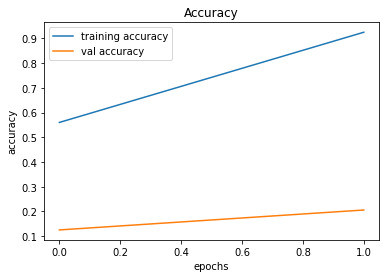

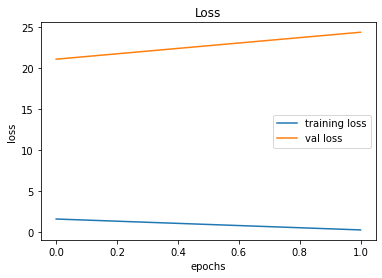

In [30]:
# using ten epochs for the training and saving the accuracy for each epoch
epochs = 2
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
                    validation_data=(X_val, y_val))

# Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [31]:
model.save("./models/Test_Model_2epoch.h5")